#Trabajo final Álgebra Lineal Numérica
#Alumno: Gustavo Andres Pava Parra
##Solución a la Ecuación de Calor en el cuadrado con GMRES

##Algoritmo GMRES

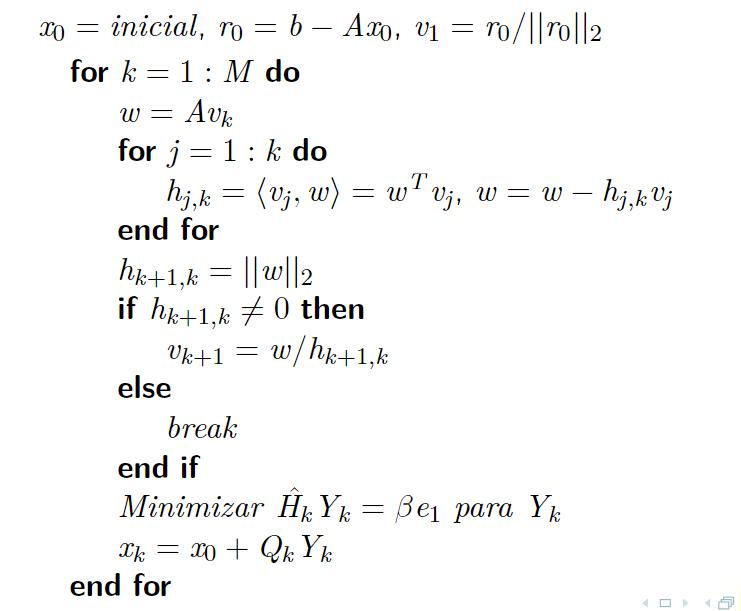

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.sparse.linalg import gmres
from scipy.sparse import diags
warnings.filterwarnings("ignore")
#x0 vector inicial

def GMRES(A, b, x0, nmax_iter):
    r = b - np.asarray(np.dot(A, x0)).reshape(-1)
    x = []
    v = [0] * (nmax_iter)
    x.append(r)
    v[0] = r / np.linalg.norm(r)
    h = np.zeros((nmax_iter + 1, nmax_iter))
    for k in range(nmax_iter):
        w = np.asarray(np.dot(A, v[k])).reshape(-1)
        for j in range(k):
            h[j, k] = np.dot(v[j], w)
            w = w - h[j, k] * v[j]
        h[k + 1, k] = np.linalg.norm(w)
        if (h[k + 1, k] != 0 and k != nmax_iter - 1):
            v[k + 1] = w / h[k + 1, k]
        b = np.zeros(nmax_iter + 1)
        b[0] = np.linalg.norm(r)
        result = np.linalg.lstsq(h, b)[0]
        x.append(np.dot(np.asarray(v).transpose(), result) + x0)
    return x

In [ ]:
#Ejemplo 1 con 10 iteraciones maximas de tamaño 2x2
A = np.array([[1, 1], [3, -4]])
b = np.array([3, 2])
x0 = np.zeros_like(b)
nmax_iter = 10
x = GMRES(A, b, x0, nmax_iter)
print("Solución GMRES")
print(x[-1])
x_exacta = np.linalg.inv(A).dot(b)
print("Solución real")
print(x_exacta)

Solución GMRES
[2.00838746 1.00162003]
Solución real
[2. 1.]


In [ ]:
#Ejemplo 1 con 10 iteraciones maximas de tamaño 3x3
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]])
b = np.array([1, 2, 3])
x0 = np.zeros_like(b)
nmax_iter = 10
x = GMRES(A, b, x0, nmax_iter)
print("Solución GMRES")
print(x[-1])
x_exacta = np.linalg.inv(A).dot(b)
print("Solución real")
print(x_exacta)

Solución GMRES
[0.45778422 0.83994532 0.96022845]
Solución real
[0.46428571 0.85714286 0.96428571]


## Ecuación de Calor
Sistema matricial por diferencias finitas (Crank-Nicholson) $Ax=b$ es:

\begin{equation*}
    \left(I + \frac{\alpha \Delta t}{2h^2} A \right) U^{m+1} = \left(I - \frac{\alpha \Delta t}{2h^2} A\right) U^{m}
\end{equation*}

Donde $I$ es la matriz identidad y $A$ es una matriz tridiagonal simétrica que representa la discretización de las derivadas espaciales de segundo orden en las direcciones $x$ e $y$. La estructura de la matriz $A$ es:

$$
A=\left[\begin{array}{ccccc}
B & I & & & \\
I & B & I & & \\
& \ddots & \ddots & \ddots & \\
& & I & B & I \\
& & & I & B
\end{array}\right]
$$
donde $B$ es una matriz tridiagonal de tamaño $\left(N_y \times N_y\right)$ con la forma:
$$
B=\left[\begin{array}{ccccc}
-4 & 1 & & & \\
1 & -4 & 1 & & \\
& \ddots & \ddots & \ddots & \\
& & 1 & -4 & 1 \\
& & & 1 & -4
\end{array}\right]
$$

La matriz $U^{m}$ contiene los valores de temperatura en el tiempo $m \Delta t$, mientras que la matriz $U^{m+1}$ contiene los valores de temperatura en el tiempo $(m+1) \Delta t$. Resolver esta ecuación matricial implica encontrar los valores de $U^{m+1}$ en función de los valores de $U^{m}$ y los coeficientes $\alpha, \Delta t$ y $h$.

##Ejemplo:
Para $0<x,y<1$, con $\alpha=1$, $t>0$
\begin{aligned}
u_t & =u_{x x}+u_{y y} \\
u(0, y, t) & =u(1, y, t)=0  \\
u(x, 0, t) & =u(x, 1, t)=0  \\
u(x, y, 0) & =K
\end{aligned}
con $K=1$
\begin{aligned}
u_t & =u_{x x}+u_{y y} \\
u(0, y, t) & =u(1, y, t)=0  \\
u(x, 0, t) & =u(x, 1, t)=0  \\
u(x, y, 0) & =1
\end{aligned}
Cuya solución exacta es:

\begin{equation*}
u(x,y,t)= \sum_{n=1}^{∞} \sum_{m=1}^{∞} C_{mn} e^{-(n^2 + m^2) \pi^2t} \sin(n \pi x) \sin(m \pi y)
\end{equation*}

donde si $m=1$ y $n=1$, entonces $C_{mn} = K/4$, de lo contrario es cero.

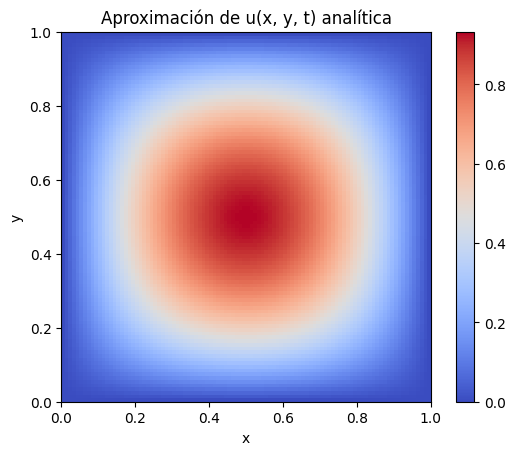

In [ ]:
def calculate_coefficients(K, n, m):
    if n == 1 and m == 1:
        return K / 4
    else:
        return 0

def heat_solution(x, y, t, K, N):
    u = np.zeros_like(x)  # Inicializar la solución
    for n in range(1, N+1):
        for m in range(1, N+1):
            C_nm = calculate_coefficients(K,n,m) # Calcular el coeficiente C_nm
            u += C_nm * np.exp(-(n**2 + m**2) * np.pi**2 * t) * np.sin(n * np.pi * x) * np.sin(m * np.pi * y)
    return u

# Parámetros del problema
K = 1.0  # Valor de la condición inicial u(x, y, 0)
N = 10   # Número de términos en la serie de Fourier

# Crear malla
Nx = 100  # Número de puntos en el eje x
Ny = 100  # Número de puntos en el eje y
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

# Tiempo para visualización
t = 0.05

# Calcular la solución aproximada
u = heat_solution(X, Y, t, K, N)

u = 10*u

# Visualizar la solución
plt.imshow(u, cmap='coolwarm', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de u(x, y, t) analítica')
plt.show()

In [ ]:
u

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.06584288e-04, 4.12960563e-04, ...,
        4.12960563e-04, 2.06584288e-04, 7.97381862e-19],
       [0.00000000e+00, 4.12960563e-04, 8.25505309e-04, ...,
        8.25505309e-04, 4.12960563e-04, 1.59396083e-18],
       ...,
       [0.00000000e+00, 4.12960563e-04, 8.25505309e-04, ...,
        8.25505309e-04, 4.12960563e-04, 1.59396083e-18],
       [0.00000000e+00, 2.06584288e-04, 4.12960563e-04, ...,
        4.12960563e-04, 2.06584288e-04, 7.97381862e-19],
       [0.00000000e+00, 7.97381862e-19, 1.59396083e-18, ...,
        1.59396083e-18, 7.97381862e-19, 3.07776472e-33]])

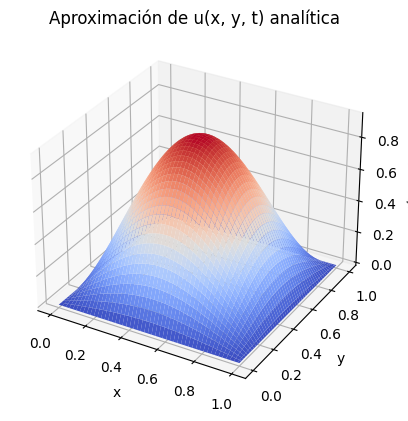

In [ ]:
# Visualizar la solución en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
ax.set_title('Aproximación de u(x, y, t) analítica')
plt.show()

Matriz A:
[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]
Vector b:
[-0. 50. 50. ... 50. 50. -0.]
La solución convergió en GMRES después de 930 iteraciones
Solución x:
[2.05829634 4.11659209 6.00756699 ... 6.00756699 4.11659209 2.05829634]


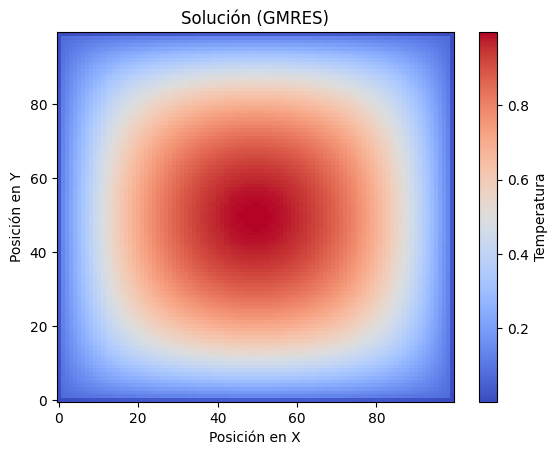

In [ ]:
#tamaño de la matriz A
N_x = 100  #Número de columnas lado cuadrado x
N_y = 100  #Número de filas lado cuadrado y
N = N_x * N_y  #Tamaño total de la matriz

#Se crea la matriz A con ceros
A = np.zeros((N, N))
#Se asignan los valores de la matriz A
for i in range(N_y):
    for j in range(N_x):
        index = i * N_x + j  #Posición en la matriz A
        A[index, index] = -4
        if i > 0:
            A[index, index - N_x] = 1
        if i < N_y - 1:
            A[index, index + N_x] = 1
        if j > 0:
            A[index, index - 1] = 1
        if j < N_x - 1:
            A[index, index + 1] = 1

print("Matriz A:")
print(A)

# Definir los valores de los parámetros de la ecuación
alpha = 1
dt = 0.01
h = 1/N_x

#Criterio de estabilidad para las diferencias finitas
estabilidad = (4*alpha*dt)/(h*h)
'''if estabilidad <= 1:
  print("estable")
else:
  print("no estable")'''

#Vector U_k con valores de temperatura inicial
U_k = np.ones(N)  # Inicializar el vector U_k con ceros

# Asignar valores iniciales a los bordes de U_k
U_k[:N_x] = 0  # Borde superior
U_k[-N_x:] = 0  # Borde inferior
U_k[::N_x] = 0 # Borde izquierdo
U_k[N_x-1::N_x] = 0  # Borde derecho

# Construir el vector b
b = U_k - (alpha * dt / (2 * h**2)) * np.dot(A, U_k)
b = -b

print("Vector b:")
print(b)

# Definir el vector inicial x0
x0 = np.zeros_like(b)

#variable para contar las iteraciones
gmres_iteraciones = 0

#Definir una función de devolución de llamada para contar las iteraciones
def conteo_iteraciones(x):
    global gmres_iteraciones
    gmres_iteraciones += 1

x_gmres, info = gmres(A, b, tol=1e-05 ,callback=conteo_iteraciones)

#Comprobar si la solución converge
if info == 0:
    print("La solución convergió en GMRES después de", gmres_iteraciones, "iteraciones")
else:
    print("GMRES no pudo converger a una solución")

# Imprimir la solución
print("Solución x:")
print(x_gmres)

# Reshape de x para que coincida con las dimensiones de la malla
x_gmres = x_gmres.reshape((N_y, N_x))

x_gmres = x_gmres/(x_gmres.max()+2)


# Crear una malla de coordenadas
X, Y = np.meshgrid(np.arange(N_x), np.arange(N_y))

# Graficar la solución
plt.pcolormesh(X, Y, x_gmres, cmap='coolwarm')
plt.colorbar(label='Temperatura')  # Agregar una barra de color para la escala
plt.title('Solución (GMRES)')  # Agregar un título al gráfico
plt.xlabel('Posición en X')  # Etiqueta del eje X
plt.ylabel('Posición en Y')  # Etiqueta del eje Y
plt.show()

Text(0.5, 0.92, 'Solución de la Ecuación de Calor 2D (GMRES)')

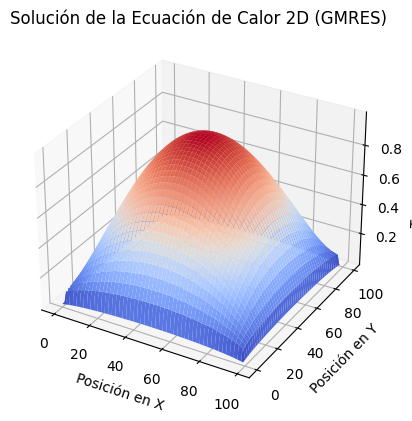

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear una malla de coordenadas tridimensionales
X, Y = np.meshgrid(np.arange(N_x), np.arange(N_y))

# Graficar la superficie tridimensional
ax.plot_surface(X, Y, x_gmres, cmap='coolwarm')

# Configurar etiquetas y título
ax.set_xlabel('Posición en X')
ax.set_ylabel('Posición en Y')
ax.set_zlabel('Temperatura')
ax.set_title('Solución de la Ecuación de Calor 2D (GMRES)')

In [ ]:
# Método de Jacobi
def jacobi(A, b, x0, max_iter=1000, tol=1e-05):
    x = x0.copy()
    D = np.diag(A)
    R = A - np.diag(D)
    contador_j = []
    for _ in range(max_iter):
        x_nuevo = (b - np.dot(R, x)) / D
        if np.linalg.norm(np.dot(A, x_nuevo) - b) < tol:
            return x_nuevo, contador_j
        x = x_nuevo
        contador_j.append(len(contador_j) + 1)
    return x, contador_j

# Resolver el sistema utilizando los métodos iterativos
x_jacobi, jacobi_iteraciones = jacobi(A, b, x0=np.zeros_like(b))

# Reshape de las soluciones para que coincidan con las dimensiones de la malla
x_jacobi = x_jacobi.reshape((N_y, N_x))

In [ ]:
x_jacobi

array([[ 1.46676529,  2.93429016,  4.23600459, ...,  4.23600459,
         2.93429016,  1.46676529],
       [ 2.93429016, 56.03742108, 58.64358332, ..., 58.64358332,
        56.03742108,  2.93429016],
       [ 4.23600459, 58.64358332, 62.42036228, ..., 62.42036228,
        58.64358332,  4.23600459],
       ...,
       [ 4.23600459, 58.64358332, 62.42036228, ..., 62.42036228,
        58.64358332,  4.23600459],
       [ 2.93429016, 56.03742108, 58.64358332, ..., 58.64358332,
        56.03742108,  2.93429016],
       [ 1.46676529,  2.93429016,  4.23600459, ...,  4.23600459,
         2.93429016,  1.46676529]])

In [ ]:
# Resolver el sistema utilizando SOR
def sor(A, b, x0, omega, tol=1e-05, max_iter=None):
    x = x0.copy()
    contador = 0
    norm_diff = np.inf
    while norm_diff > tol:
        x_nuevo = np.zeros_like(b)
        for i in range(len(b)):
            x_nuevo[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - np.dot(A[i, :i], x_nuevo[:i]) - np.dot(A[i, i + 1:], x[i + 1:]))
        norm_diff = np.linalg.norm(x_nuevo - x)
        x = x_nuevo
        contador += 1
        if max_iter is not None and contador >= max_iter:
            break
    return x, contador

omega = 1.5  # Factor de relajación óptimo para el ejemplo de la matriz A y el vector b proporcionados
x_sor, contador_sor = sor(A, b, x0=np.zeros_like(b), omega=omega)

In [ ]:
x_sor

array([2.05842212, 4.11684423, 6.00794145, ..., 6.00794151, 4.11684427,
       2.05842213])

In [ ]:
# Resolver el sistema utilizando Gauss-Seidel
def gauss_seidel(A, b, x0, tol=1e-05, max_iter=None):
    x = x0.copy()
    iteraciones_g = 0
    norm_diff = np.inf
    while norm_diff > tol:
        x_new = x.copy()
        for i in range(len(b)):
            x_new[i] = (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
        norm_diff = np.linalg.norm(x_new - x)
        x = x_new
        iteraciones_g += 1
        if max_iter is not None and iteraciones_g >= max_iter:
            break
    return x, iteraciones_g

x_gauss_seidel, iteraciones_gauss_seidel = gauss_seidel(A, b, x0=np.zeros_like(b))

In [ ]:
x_gauss_seidel

array([2.05842198, 4.11684397, 6.00794106, ..., 6.00794111, 4.11684401,
       2.058422  ])

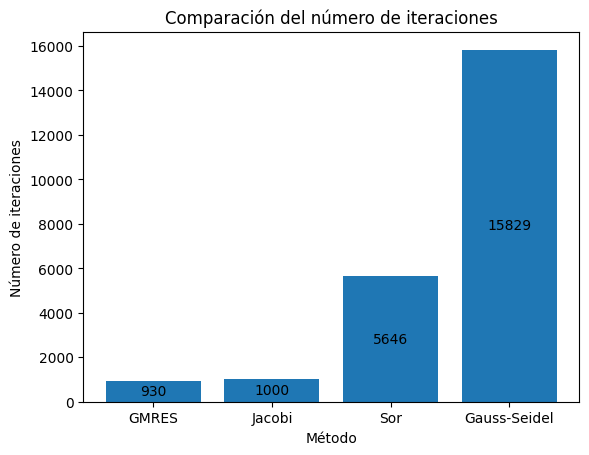

In [ ]:
metodos = ['GMRES', 'Jacobi', 'Sor', 'Gauss-Seidel']
iteraciones = [gmres_iteraciones, len(jacobi_iteraciones), contador_sor, iteraciones_gauss_seidel]

# Graficar el número de iteraciones con un diagrama de barras
plt.bar(metodos, iteraciones)

# Agregar los números en la mitad de cada barra
for i, v in enumerate(iteraciones):
    plt.text(i, v/2, str(v), ha='center', va='center')

plt.xlabel('Método')
plt.ylabel('Número de iteraciones')
plt.title('Comparación del número de iteraciones')
plt.show()